### What are Polynomial Features in Feature Engineering?

Polynomial features are a feature engineering technique in machine learning where you create new features by raising existing features to higher powers and including their interactions. This helps capture non-linear relationships between features and the target variable that a simple linear model might miss. For example, if you have a feature \(x\), polynomial features could include \(x^2\), \(x^3\), or even interaction terms like \(x_1 \cdot x_2\) if you have multiple features.

In practice, this is useful when the relationship between input features and the output isn't strictly linear. By adding these polynomial terms, you allow models (especially linear ones) to fit more complex patterns, potentially improving accuracy—though it comes with the risk of overfitting if not managed properly.

### How It Works
- **Original Features**: Suppose you have a single feature \(x\).
- **Polynomial Features (degree 2)**: You generate \(x\), \(x^2\).
- **Polynomial Features (degree 3)**: You generate \(x\), \(x^2\), \(x^3\).
- **With Multiple Features**: For two features \(x_1\) and \(x_2\), degree 2 would give \(x_1\), \(x_2\), \(x_1^2\), \(x_2^2\), \(x_1 \cdot x_2\).

This is typically implemented using `PolynomialFeatures` from scikit-learn.

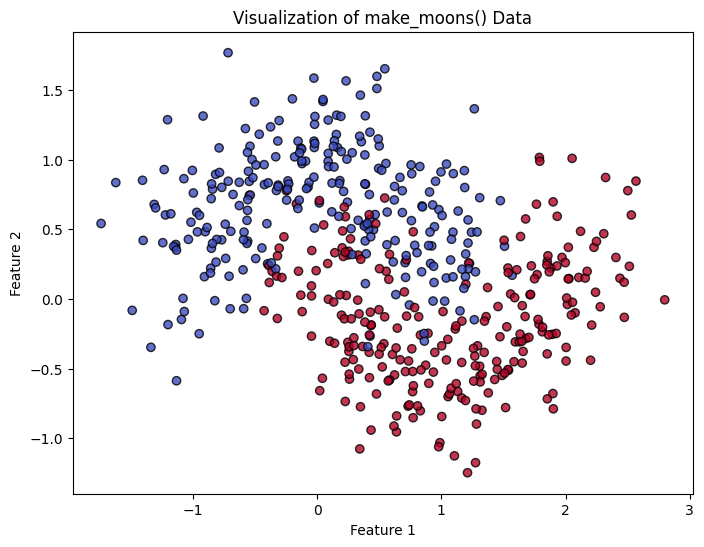

Accuracy without polynomial features: 0.8600
[[ 1.31164912 -0.55117606  1.72042341 -0.72294959  0.30379505]
 [-0.85813355  0.22055052  0.73639319 -0.1892618   0.04864253]
 [ 1.04111175  0.96722336  1.08391368  1.00698761  0.93552103]
 ...
 [-1.20537442  1.28551662  1.45292748 -1.54952885  1.65255298]
 [ 0.51572694 -0.3478216   0.26597427 -0.17938097  0.12097987]
 [ 0.56170508  0.38866262  0.31551259  0.21831377  0.15105864]]
Accuracy with polynomial features (degree 2): 0.8600
Accuracy with polynomial features (degree 3): 0.8933


In [11]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate the dataset
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

# Visualize the data
# Scatter plot of the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', alpha=0.8)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Visualization of make_moons() Data")
plt.show()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# --- Without Polynomial Features ---
model_linear = LogisticRegression(max_iter=1000)
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy without polynomial features: {accuracy_linear:.4f}")

# --- With Polynomial Features (degree 2) ---
poly2 = PolynomialFeatures(degree=2, include_bias=False)
print(poly2.fit_transform(X_train))


model_poly = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LogisticRegression(max_iter=1000)
)
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy with polynomial features (degree 2): {accuracy_poly:.4f}")

# --- With Polynomial Features (degree 3) ---
model_poly3 = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    LogisticRegression(max_iter=1000)
)
model_poly3.fit(X_train, y_train)
y_pred_poly3 = model_poly3.predict(X_test)
accuracy_poly3 = accuracy_score(y_test, y_pred_poly3)
print(f"Accuracy with polynomial features (degree 3): {accuracy_poly3:.4f}")

